In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def confidence_ellipsoid3(mu, sigma, ax, conf=0.90, **kwargs):
    """ Plot a 3D ellipsoid using mu and covariance matrix
    
    Args:
    - mu: mean vector of the dataset (1x3)
    - sigma: covariance matrix of the dataset (3x3)
    - ax: 3D axis. You can obtain one using `fig.gca(projection='3d')`
    - kwargs: customized styling of the ellipsoid
    Author:
    - Yu Fang
    """
    D, P = np.linalg.eig(sigma)
    # automatic scaling using the confidence level
    scale = np.sqrt(chi2.ppf(conf, 3))

    # mesh using uv-coord
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    # transform to x,y,z, scaled by sqrt(lambda) in each axis
    x = np.sqrt(D[0]) * np.outer(np.cos(u), np.sin(v))
    y = np.sqrt(D[1]) * np.outer(np.sin(u), np.sin(v))
    z = np.sqrt(D[2]) * np.outer(np.ones_like(u), np.cos(v))
    # apply rotation, confidence scaling, translation
    xyz_trans = scale * (P @ np.vstack([x.flatten(),y.flatten(),z.flatten()])) + mu.reshape(3,1)
    x = xyz_trans[0].reshape(100,100)
    y = xyz_trans[1].reshape(100,100)
    z = xyz_trans[2].reshape(100,100)

    ax.plot_wireframe(x, y, z, linewidth=0.5, alpha=0.5, **kwargs)

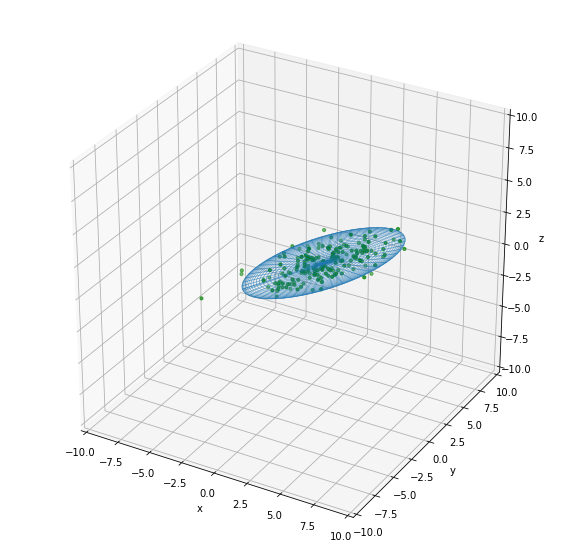

In [3]:
# Example usage
# random covariance matrix and mean
sigma = np.array([[3,2,1],
                  [2,2,1],
                  [1,1,1]])
mu = np.array([3,-1,2])
# generate a dataset using the sigma and mu
A = np.random.multivariate_normal(mu, sigma, 200)

# sample mean and cov
mu_exp = A.mean(axis=0)
A_ctr = A - mu
sigma_exp = A_ctr.T @ A_ctr / (A.shape[0]-1)
# confidence level
conf = 0.90

# remember to use a 3D axis
fig = plt.figure(figsize=2.5 * plt.figaspect(1))
ax = fig.gca(projection='3d')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(A[:,0],A[:,1],A[:,2], s=10,c='g')
confidence_ellipsoid3(mu_exp, sigma_exp, ax, conf)

plt.show()